# Prepare data for the pipeline

In [1]:
%%capture
import nbimporter
import pandas as pd
from utils import DataTransformation
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/housing/housing.csv')
dt = DataTransformation(df, test_size=0.25)

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
Tr, Xr = dt.random_test()
Th, Xh = dt.hash_test()
Ts, Xs = dt.stratified_test(column='median_house_value', strata=5)

In [5]:
print (Xr.shape, Xh.shape, Xs.shape)

(5160, 10) (5219, 10) (5160, 10)


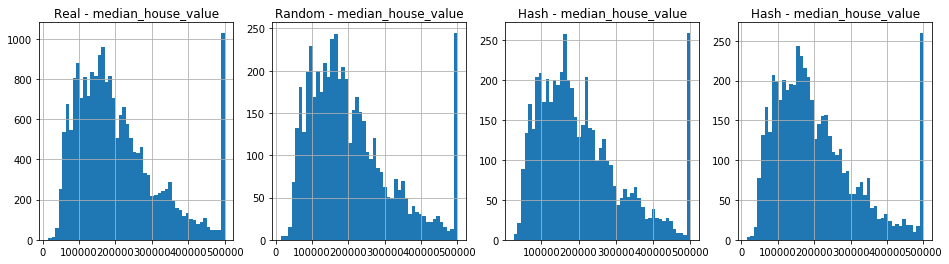

In [6]:
column = 'median_house_value'
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
df[column].hist(bins=50, ax=axes[0])
axes[0].set_title('Real - {}'.format(column))
Xr[column].hist(bins=50, ax=axes[1])
axes[1].set_title('Random - {}'.format(column))
Xh[column].hist(bins=50, ax=axes[2])
axes[2].set_title('Hash - {}'.format(column))
Xs[column].hist(bins=50, ax=axes[3])
axes[3].set_title('Hash - {}'.format(column))
plt.show()